In [1]:
#import matplotlib.pyplot as plt
import math
from RSSmodel import *
import numpy as np
from matplotlib import pyplot as plt
import random
from main import *

In [2]:
env = RssEnv()

### 测试

测试Env类所有公开方法。

In [3]:
epoch_num = 0
m_num = 0
for each in range(100):
    env = RssEnv()
    s1,r1 = env.step(0)
    s2,r2 = env.step(1)
    s3,r3 = env.step(2)
    if(r2>r1 or r3>r1):
        m_num += 1
    #print('the epoch {} winner is {}'.format(epoch_num, np.argmax([r1,r2,r3])))
    #print('直接传输 状态{}，效用{}'.format(s1,r1))
    #print('中继1传输 状态{}，效用{}'.format(s2,r2))
    #print('中继2传输 状态{}，效用{}'.format(s3,r3))
    #epoch_num += 1
print('中继转发：{}'.format(m_num))

NameError: name '_d_move' is not defined

In [ ]:
y = [env._g_channel_gain(x) for x in np.arange(-1,1, 0.001) ]
plt.plot(np.arange(-1,1,0.001), y)

In [ ]:
def fun1(x, y):
    g1 = g_channel_gain(x)
    g2 = g_channel_gain(y)
    return 0.1*0.06*g1*g2 / (0.1*(0.1*g1 + 0.06*g2 )+ 0.01)

In [ ]:
def g_channel_gain(x):
        mu = 0
        sigma2 = 0.16
        y = 1.0/np.sqrt(2*math.pi*sigma2) * np.exp(-(x-mu)**2 /(2*sigma2))
        #a = np.random.normal(mu, sigma2**0.5)
        return y

In [ ]:
x =  np.arange(-1,1,0.01)
y = np.arange(-1,1,0.01)
x,y = np.meshgrid(x,y)
#z = 
ax = plt.axes(projection='3d')
ax.plot_surface(x, y, fun1(x,y), rstride=1,cstride=1,cmap=plt.cm.spring)

(0.7955966076511112, -0.7863530331238588)


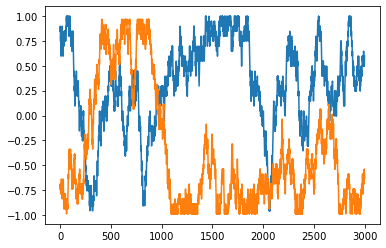

In [3]:
print(env.d_point)
ret = []
for _ in range(3000):
    env._d_move()
    ret.append(env.d_point)
plt.plot(range(3000), ret)

In [26]:
env = RssEnv()
agent = Agent(env)
print("Learning...")  
agent.learning(gamma=0.9, \
            alpha=0.1, \
            max_episode_num=1000)


Learning...
Episode 1 takes 101 steps.
Episode 2 takes 101 steps.
Episode 3 takes 101 steps.
Episode 4 takes 101 steps.
Episode 5 takes 101 steps.
Episode 6 takes 101 steps.
Episode 7 takes 101 steps.
Episode 8 takes 101 steps.
Episode 9 takes 101 steps.
Episode 10 takes 101 steps.
Episode 11 takes 101 steps.
Episode 12 takes 101 steps.
Episode 13 takes 101 steps.
Episode 14 takes 101 steps.
Episode 15 takes 101 steps.
Episode 16 takes 101 steps.
Episode 17 takes 101 steps.
Episode 18 takes 101 steps.
Episode 19 takes 101 steps.
Episode 20 takes 101 steps.
Episode 21 takes 101 steps.
Episode 22 takes 101 steps.
Episode 23 takes 101 steps.
Episode 24 takes 101 steps.
Episode 25 takes 101 steps.
Episode 26 takes 101 steps.
Episode 27 takes 101 steps.
Episode 28 takes 101 steps.
Episode 29 takes 101 steps.
Episode 30 takes 101 steps.
Episode 31 takes 101 steps.
Episode 32 takes 101 steps.
Episode 33 takes 101 steps.
Episode 34 takes 101 steps.
Episode 35 takes 101 steps.
Episode 36 takes 

Episode 296 takes 101 steps.
Episode 297 takes 101 steps.
Episode 298 takes 101 steps.
Episode 299 takes 101 steps.
Episode 300 takes 101 steps.
Episode 301 takes 101 steps.
Episode 302 takes 101 steps.
Episode 303 takes 101 steps.
Episode 304 takes 101 steps.
Episode 305 takes 101 steps.
Episode 306 takes 101 steps.
Episode 307 takes 101 steps.
Episode 308 takes 101 steps.
Episode 309 takes 101 steps.
Episode 310 takes 101 steps.
Episode 311 takes 101 steps.
Episode 312 takes 101 steps.
Episode 313 takes 101 steps.
Episode 314 takes 101 steps.
Episode 315 takes 101 steps.
Episode 316 takes 101 steps.
Episode 317 takes 101 steps.
Episode 318 takes 101 steps.
Episode 319 takes 101 steps.
Episode 320 takes 101 steps.
Episode 321 takes 101 steps.
Episode 322 takes 101 steps.
Episode 323 takes 101 steps.
Episode 324 takes 101 steps.
Episode 325 takes 101 steps.
Episode 326 takes 101 steps.
Episode 327 takes 101 steps.
Episode 328 takes 101 steps.
Episode 329 takes 101 steps.
Episode 330 ta

Episode 582 takes 101 steps.
Episode 583 takes 101 steps.
Episode 584 takes 101 steps.
Episode 585 takes 101 steps.
Episode 586 takes 101 steps.
Episode 587 takes 101 steps.
Episode 588 takes 101 steps.
Episode 589 takes 101 steps.
Episode 590 takes 101 steps.
Episode 591 takes 101 steps.
Episode 592 takes 101 steps.
Episode 593 takes 101 steps.
Episode 594 takes 101 steps.
Episode 595 takes 101 steps.
Episode 596 takes 101 steps.
Episode 597 takes 101 steps.
Episode 598 takes 101 steps.
Episode 599 takes 101 steps.
Episode 600 takes 101 steps.
Episode 601 takes 101 steps.
Episode 602 takes 101 steps.
Episode 603 takes 101 steps.
Episode 604 takes 101 steps.
Episode 605 takes 101 steps.
Episode 606 takes 101 steps.
Episode 607 takes 101 steps.
Episode 608 takes 101 steps.
Episode 609 takes 101 steps.
Episode 610 takes 101 steps.
Episode 611 takes 101 steps.
Episode 612 takes 101 steps.
Episode 613 takes 101 steps.
Episode 614 takes 101 steps.
Episode 615 takes 101 steps.
Episode 616 ta

Episode 868 takes 101 steps.
Episode 869 takes 101 steps.
Episode 870 takes 101 steps.
Episode 871 takes 101 steps.
Episode 872 takes 101 steps.
Episode 873 takes 101 steps.
Episode 874 takes 101 steps.
Episode 875 takes 101 steps.
Episode 876 takes 101 steps.
Episode 877 takes 101 steps.
Episode 878 takes 101 steps.
Episode 879 takes 101 steps.
Episode 880 takes 101 steps.
Episode 881 takes 101 steps.
Episode 882 takes 101 steps.
Episode 883 takes 101 steps.
Episode 884 takes 101 steps.
Episode 885 takes 101 steps.
Episode 886 takes 101 steps.
Episode 887 takes 101 steps.
Episode 888 takes 101 steps.
Episode 889 takes 101 steps.
Episode 890 takes 101 steps.
Episode 891 takes 101 steps.
Episode 892 takes 101 steps.
Episode 893 takes 101 steps.
Episode 894 takes 101 steps.
Episode 895 takes 101 steps.
Episode 896 takes 101 steps.
Episode 897 takes 101 steps.
Episode 898 takes 101 steps.
Episode 899 takes 101 steps.
Episode 900 takes 101 steps.
Episode 901 takes 101 steps.
Episode 902 ta

0


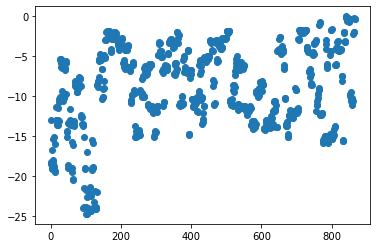

In [27]:
lis = []
for each1 in agent.Q.values():
    for each2 in each1.values():
        if(each2>0):
            print(each1)
        lis.append(each2)
lis = np.array(lis)

print(len([0 for each in (lis > 0) if each==True]))
plt.scatter(range(len(lis)),lis)